In [ ]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
from Shapley import ShapNN
from DShap import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
%matplotlib inline
MEM_DIR = './'

Let's have a calssification problem and use the a losigitic regression model for a small data set of size 100.

In [ ]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 100

## Create Synthetic Dataset

Let's create a synthetic data set with input-output $y = Bernouli(f(x))$ where $f$ is a polynomial of oder 'difficulty' and $x \in \mathscr{R}^d$. ('important_dims' determines the number of $d$ dimensions in $x$ that are non-null)

In [ ]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

## Running

Now let's create the instance that takes cares of computing all the algorithms for the data set. Here we run it several times one-after-another, but in a real-world scenario they could be run in parallel. 

In [ ]:
X, y = X_raw[:train_size], y_raw[:train_size]
X_test, y_test = X_raw[train_size:], y_raw[train_size:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              sources=None, 
              sample_weight=None,
              model_family=model, 
              metric='accuracy',
              overwrite=True,
              directory=directory, seed=0)
dshap.run(100, 0.1, g_run=False)

Starting LOO score calculations!
LOO values calculated!


/share/software/user/open/py-scikit-learn/0.19.1_py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = None.
  " = {}.".format(self.n_jobs))
/share/software/user/open/py-scikit-learn/0.19.1_py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = None.
  " = {}.".format(self.n_jobs))


10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.


In [ ]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1)

In [ ]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=2)
dshap.run(100, 0.1)

Now we merge results for the parallel runs:

In [65]:
dshap.merge_results()

./temp/mem_tmc_0000.pkl
./temp/mem_g_0000.pkl


Let's look at the convergence plots of the algorithms.

In [ ]:
convergence_plots(dshap.marginals_tmc)

In [ ]:
convergence_plots(dshap.marginals_g)

Now let's see the effect of removing high valuen points

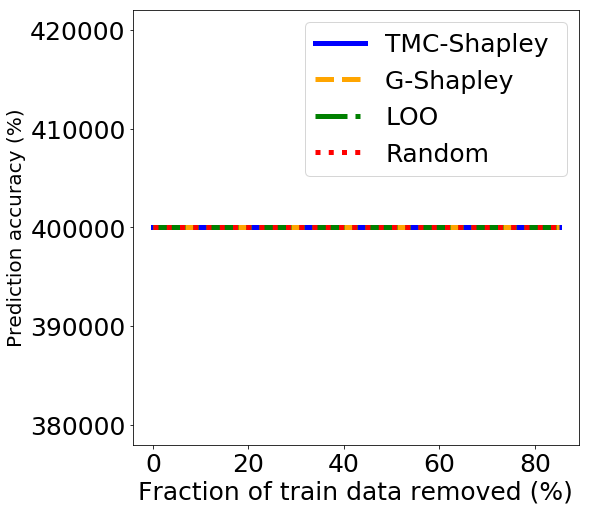

In [68]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)